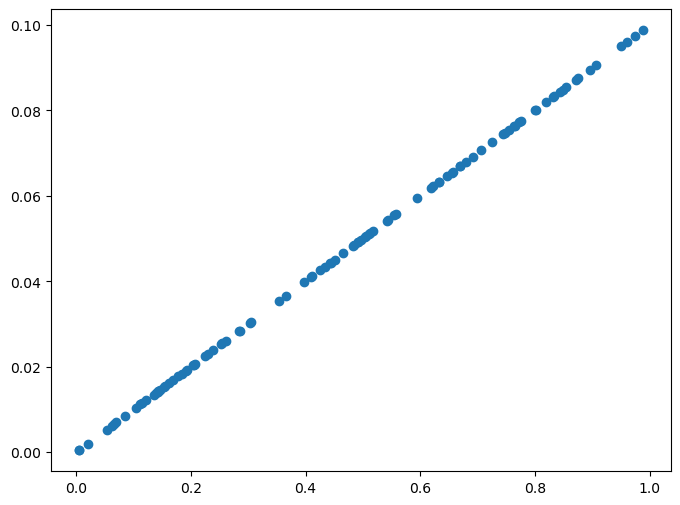

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.random.rand(100)
y = 0.2*X*0.5 #y= 0.2 X 0.5

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.show()

In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

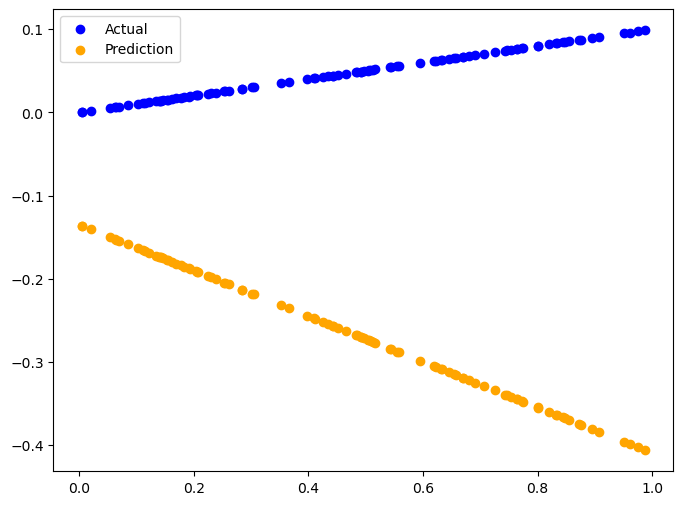

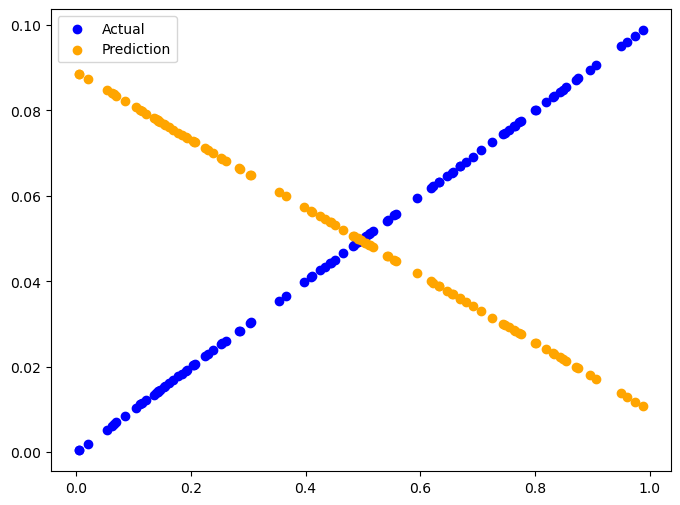

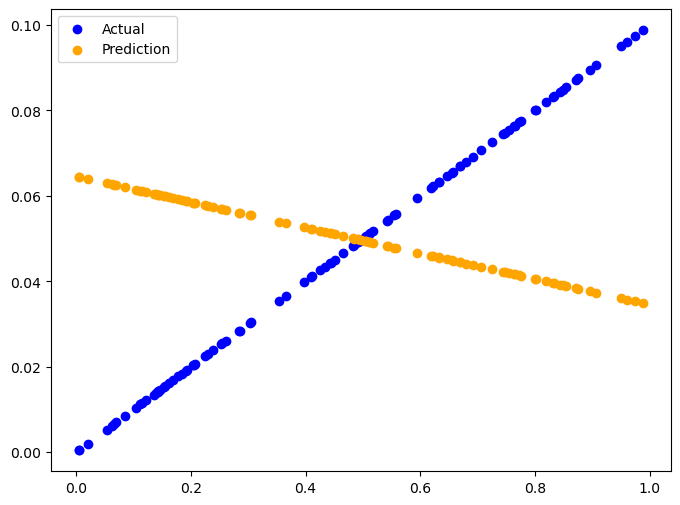

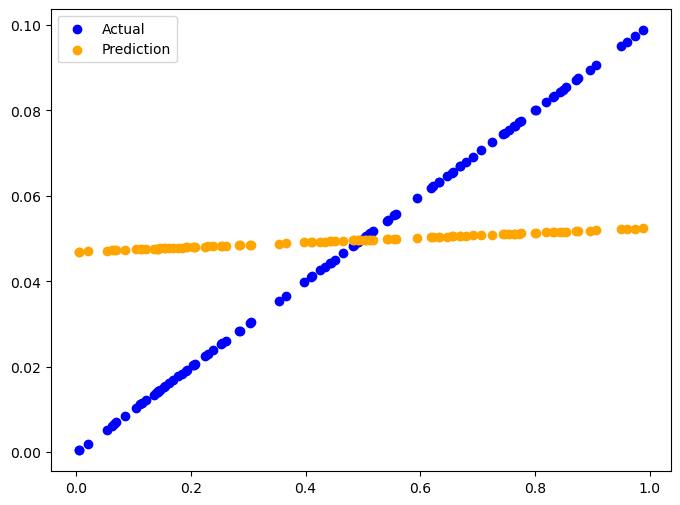

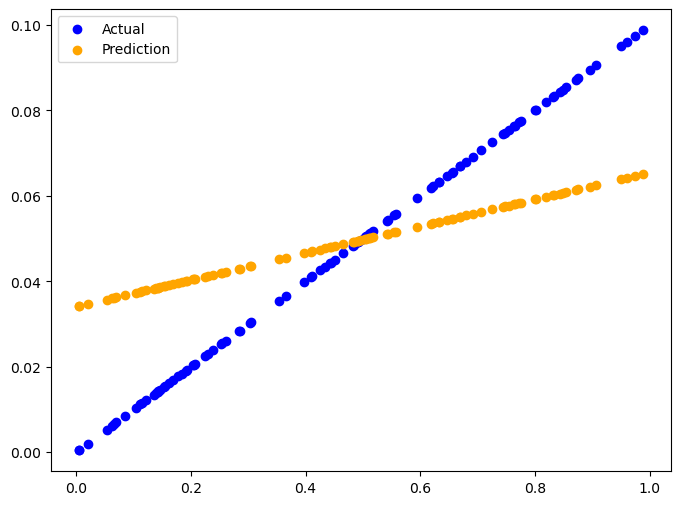

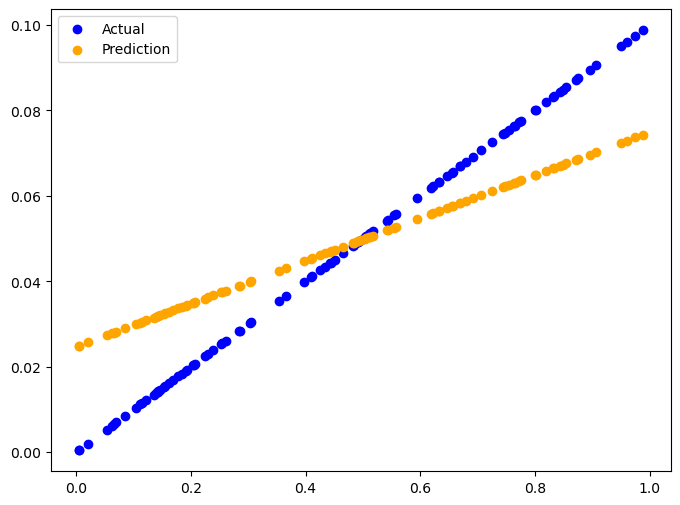

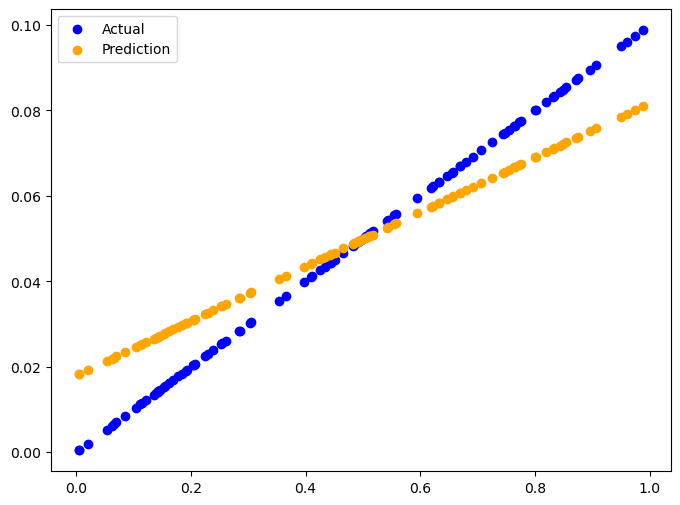

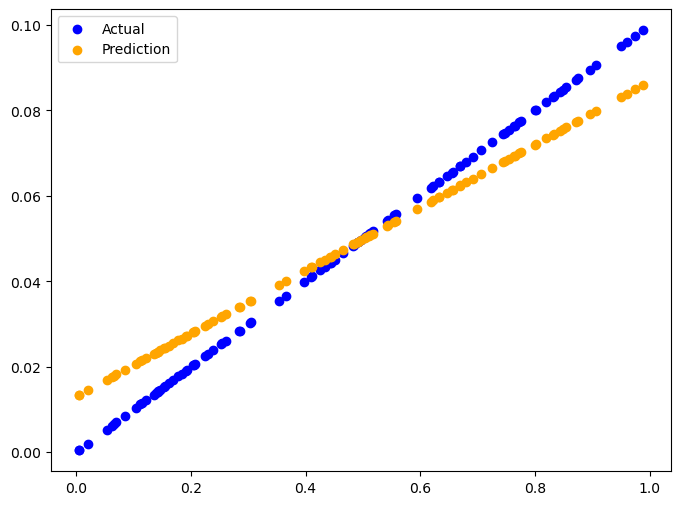

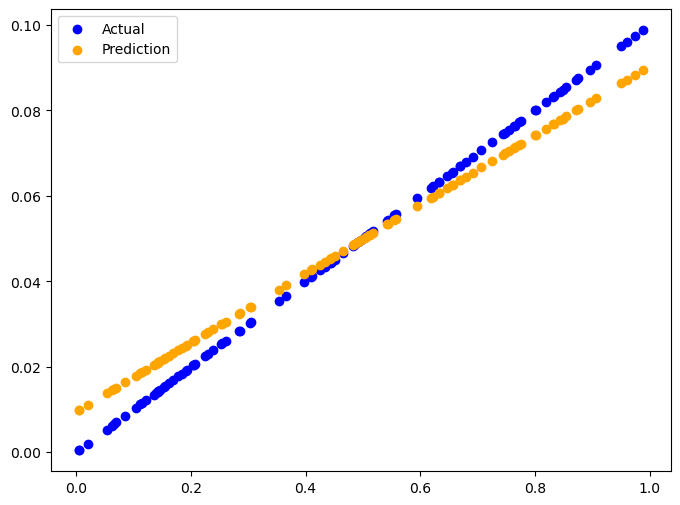

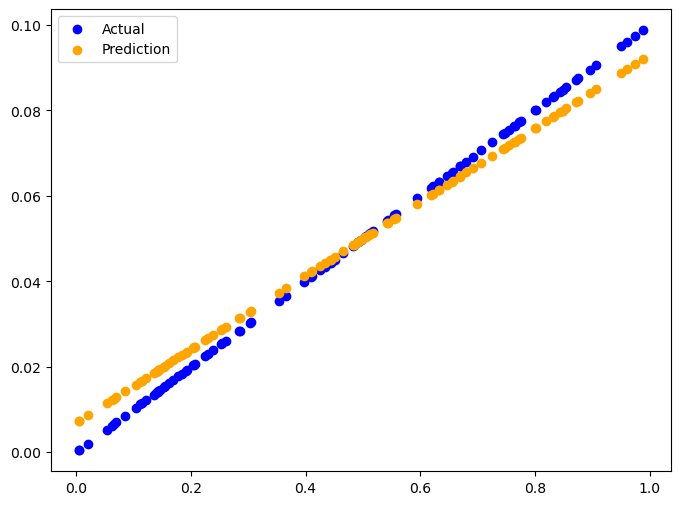

In [8]:
# 단순경사하강법 y=WX+b

#가중치의 초기값
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5

for epoch in range (100):
    y_pred = W * X + b  #예측함수
    error = np.abs(y_pred - y).mean()  #손실함수 - 절대값
    if error<0.001 :
        break  #오차가 0에 가까워지면 반복 종료

    #새로운 W를 찾는다 > 오차 > 기울기 계산 > 학습율 적용 > W_update, b_update
    W_descent = learning_rate* ((y_pred - y)*X).mean()
    b_descent = learning_rate* (y_pred - y).mean()

    W = W - W_descent #기울기의 반대방향으로 적용
    b = b - b_descent

    if epoch % 10 == 0 :
        y_pred = W * X + b
        plt_prediction(y_pred, y)


# LinearRegression 을 이용한 보스턴 주택 가격 예측 모델 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


c:\Users\ylee\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#LR 모델 생성
y = bostonDF['PRICE']
X = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred[:3]

array([23.15424087, 19.65590246, 36.42005168])

In [19]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'r2 score : {r2_score(y_test, y_pred)}')
print(f'wo : {np.round(lr.intercept_,1)}, w1: {np.round(lr.coef_,1)}')

MSE : 17.297, RMSE : 4.159
r2 score : 0.7572263323138938
wo : 41.0, w1: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [20]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse)

print(f'neg_MSE : {neg_mse_scores}')
print(f' rmse : {rmse}')
print(f'avg_rmse : {avg_rmse}')

neg_MSE : [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
 rmse : [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
avg_rmse : 5.8286589462158265


In [23]:
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
avg_r2 = np.mean(r2_scores)
print(f'avg_r2 : {avg_r2}')

avg_r2 : 0.3532759243958783


In [24]:
# 보스톤 집값 데이터 다항회귀 분석

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import pandas as pd

import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


Boston 데이타셋 크기 : (506, 14)


c:\Users\ylee\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [ ]:
results = []

for degree in range(1,15):
    
    p_model = Pipeline([('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                    ('linear', LinearRegression())])

    p_model.fit(X_train, y_train)
    y_preds = p_model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)


    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
    print('R2 score : {0:.3f}'.format(r2))

MSE : 17.297 , RMSE : 4.159
R2 score : 0.757
MSE : 15.556 , RMSE : 3.944
R2 score : 0.782
MSE : 79625.594 , RMSE : 282.180
R2 score : -1116.598
MSE : 170599.949 , RMSE : 413.037
R2 score : -2393.483
MSE : 17772.652 , RMSE : 133.314
R2 score : -248.451
MSE : 22537.056 , RMSE : 150.123
R2 score : -315.322
MSE : 94616.596 , RMSE : 307.598
R2 score : -1327.007
MSE : 161067.517 , RMSE : 401.332
R2 score : -2259.689


# Ridge 회귀, Lasso 회귀, ElasticNet